In [6]:
import os

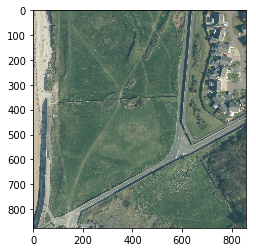

In [7]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
im = Image.open('11.TIF', 'r')
imshow(np.asarray(im))

In [21]:
# let's slice the picture on squares and create training set for the neural net
# The sliding window size is 32 × 32, the sliding step is 32. 
#Some repetitive windows are filtered by a small distance limit (5 pixel).
# we will not include the patches 81, 601, 624, 653, 654, 656, 659, 660 as they are cars
patches_cars = {81, 601, 624, 653, 654, 656, 659, 660}
size = 32 
step = 32 
import os
if not os.path.exists('no_car/'):
    os.makedirs('no_car/')
k = 0
k_out = 0
width, height = im.size
for i in range(0,width-size,step):
    for j in range(0,height-size,step):
        area = (i, j, i+size, j+size)
        cropped_img = im.crop(area)
        k += 1
        if k not in patches_cars:
            k_out += 1
            cropped_img.save('no_car/'+str(k_out)+'.TIF')
            
#        imshow(np.asarray(cropped_img))


In [22]:
im = Image.open('12.TIF', 'r')
patches_cars = {17,22,23,114,117,119,329,388,424,425,426,427,445,527,577,579,580,617,641,642,673,676,677,726,727,
809,829,831,907,908,909,910,925,998,999,1000,1005,1013,1017,1024,1094,1099,1101,1102,1109,1120,1121,1190,1198,
1205,1206,1209,1216,1278,1286,1302,1303,1304,1311,1370,1371,1372,1373,1374,1375,1392,1393,1395,
1407,1408,1409,1411,1471,1486,1488,1496,1505,1576,1577,1578,1581,1582,1604,1605,1606,1664,1665,
1666,1672,1673,1696,1697,1698,1762,1766,1767,1768,1769,1777,1783,1792,1853,1862,1863,1879,1888,1896,
1948,1949,1958,1975,1990,2048,2050,2061,2079,2080,2082,2086,2087,2088,2175,2242,2247,2253,2254,2255,
2262,2272,2278,2336,2337,2343,2344,2345,2349,2350,2367,2373,2376,2377,2436,2440,2441,2454,2455,2471}

import os
if not os.path.exists('no_car/'):
    os.makedirs('no_car/')
k = 0
width, height = im.size
for i in range(0,width-size,step):
    for j in range(0,height-size,step):
        area = (i, j, i+size, j+size)
        cropped_img = im.crop(area)
        k += 1
        if k not in patches_cars:
            k_out += 1
            cropped_img.save('no_car/'+str(k_out)+'.TIF')

In [50]:
#data augmentation
#we rotate every location window 11 times by: 0 ,
#4.5 , 9, · · · , 45 , then shrink or enlarge the non-rotating
#images into multi-scalings: 0.8,0.9,1.0,1.1,1.2,1.3.
# all the data is stored in the folder 'car'
import os
files = os.listdir('car/')
k = 294
for el in files: 
    im = Image.open('car/'+el, 'r')
    #im.save('temp/0.TIF')
    k += 1
    im.rotate(90).save('car/'+str(k)+'.TIF')
    k += 1
    im.rotate(90).transpose(Image.FLIP_LEFT_RIGHT).save('car/'+str(k)+'.TIF')
    k += 1
    im.rotate(90).transpose(Image.FLIP_TOP_BOTTOM).save('car/'+str(k)+'.TIF')
    k += 1
    im.rotate(180).save('car/'+str(k)+'.TIF')
    k += 1
    im.rotate(270).save('car/'+str(k)+'.TIF')
    k += 1
    im.transpose(Image.FLIP_LEFT_RIGHT).save('car/'+str(k)+'.TIF')
    k += 1
    im.transpose(Image.FLIP_TOP_BOTTOM).save('car/'+str(k)+'.TIF')

In [98]:
def resize_im(im, im_size, out):
    im = im.resize((im_size,im_size))
    width, height = im.size   # Get dimensions
    new_width = 32
    left = (width - new_width)/2
    right = (width + new_width)/2

    im = im.crop((left, left, right, right))
    im.save(out, im.format) 

In [100]:
files = os.listdir('car/')
k = 2324
for el in files: 
    im = Image.open('car/'+el, 'r')
    k += 1
    resize_im(im, 35, 'car/'+str(k)+'.TIF')
    k += 1
    resize_im(im, 38, 'car/'+str(k)+'.TIF')
    k += 1
    resize_im(im, 42, 'car/'+str(k)+'.TIF')

In [102]:
# rotate images which are no_car
files = os.listdir('no_car/')
k = 3043
for el in files:
    im = Image.open('no_car/'+el, 'r')
    k += 1
    im.rotate(90).save('no_car/'+str(k)+'.TIF')
    k += 1
    im.rotate(90).transpose(Image.FLIP_LEFT_RIGHT).save('no_car/'+str(k)+'.TIF')
    k += 1
    im.rotate(90).transpose(Image.FLIP_TOP_BOTTOM).save('no_car/'+str(k)+'.TIF')
    k += 1
    im.rotate(180).save('no_car/'+str(k)+'.TIF')
    k += 1
    im.rotate(270).save('no_car/'+str(k)+'.TIF')
    k += 1
    im.transpose(Image.FLIP_LEFT_RIGHT).save('no_car/'+str(k)+'.TIF')
    k += 1
    im.transpose(Image.FLIP_TOP_BOTTOM).save('no_car/'+str(k)+'.TIF')    

In [7]:
# resize data as ResNet has 224x224 image as input
files = os.listdir('car/')
im_size = 224
if not os.path.exists('resnet/car/'):
    os.makedirs('resnet/car/')
for el in files: 
    im = Image.open('car/'+el, 'r')
    im = im.resize((im_size,im_size))
    im.save('resnet/car/'+el, im.format) 

In [11]:
files = os.listdir('no_car/')
im_size = 224
if not os.path.exists('resnet/no_car/'):
    os.makedirs('resnet/no_car/')
for el in files: 
    im = Image.open('no_car/'+el, 'r')
    im = im.resize((im_size,im_size))
    im.save('resnet/no_car/'+el, im.format) 

In [8]:
# separate data on training and validation set 
# test set
files = os.listdir('resnet/car/')
# 9261 cars
# test: 20% = 1852
# 7409 = for valid + train
# 1481 = for valid 
# 5928 = for train
k = 0
for el in files: 
    k += 1
    im = Image.open('resnet/car/'+el, 'r')
    if k<=1852:
        im.save('resnet/test/car/'+el, im.format)
    elif (k>1852) and (k<=3333):
        im.save('resnet/valid/car/'+el, im.format)      
    else: 
        im.save('resnet/train/car/'+el, im.format)

In [12]:
# separate data on training and validation set 
# test set
files = os.listdir('resnet/no_car/')
print(len(files))

24442


In [13]:

# 24442 cars
# test: 20% = 4888
# 19554 = for valid + train
# 3910 = for valid 
# 15644 = for train
k = 0
for el in files: 
    k += 1
    im = Image.open('resnet/no_car/'+el, 'r')
    if k<=4888:
        im.save('resnet/test/no_car/'+el, im.format)
    elif (k>4888) and (k<=8798):
        im.save('resnet/valid/no_car/'+el, im.format)      
    else: 
        im.save('resnet/train/no_car/'+el, im.format)

In [2]:
# Copyright 2016 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================
"""Contains definitions for the original form of Residual Networks.
The 'v1' residual networks (ResNets) implemented in this module were proposed
by:
[1] Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun
    Deep Residual Learning for Image Recognition. arXiv:1512.03385
Other variants were introduced in:
[2] Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun
    Identity Mappings in Deep Residual Networks. arXiv: 1603.05027
The networks defined in this module utilize the bottleneck building block of
[1] with projection shortcuts only for increasing depths. They employ batch
normalization *after* every weight layer. This is the architecture used by
MSRA in the Imagenet and MSCOCO 2016 competition models ResNet-101 and
ResNet-152. See [2; Fig. 1a] for a comparison between the current 'v1'
architecture and the alternative 'v2' architecture of [2] which uses batch
normalization *before* every weight layer in the so-called full pre-activation
units.
Typical use:
   from tensorflow.contrib.slim.python.slim.nets import
   resnet_v1
ResNet-101 for image classification into 1000 classes:
   # inputs has shape [batch, 224, 224, 3]
   with slim.arg_scope(resnet_v1.resnet_arg_scope()):
      net, end_points = resnet_v1.resnet_v1_101(inputs, 1000, is_training=False)
ResNet-101 for semantic segmentation into 21 classes:
   # inputs has shape [batch, 513, 513, 3]
   with slim.arg_scope(resnet_v1.resnet_arg_scope()):
      net, end_points = resnet_v1.resnet_v1_101(inputs,
                                                21,
                                                is_training=False,
                                                global_pool=False,
                                                output_stride=16)
"""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from tensorflow.contrib import layers
from tensorflow.contrib.framework.python.ops import add_arg_scope
from tensorflow.contrib.framework.python.ops import arg_scope
from tensorflow.contrib.layers.python.layers import layers as layers_lib
from tensorflow.contrib.layers.python.layers import utils
from tensorflow.contrib.slim.python.slim.nets import resnet_utils
from tensorflow.python.ops import math_ops
from tensorflow.python.ops import nn_ops
from tensorflow.python.ops import variable_scope

resnet_arg_scope = resnet_utils.resnet_arg_scope


@add_arg_scope
def bottleneck(inputs,
               depth,
               depth_bottleneck,
               stride,
               rate=1,
               outputs_collections=None,
               scope=None):
  """Bottleneck residual unit variant with BN after convolutions.
  This is the original residual unit proposed in [1]. See Fig. 1(a) of [2] for
  its definition. Note that we use here the bottleneck variant which has an
  extra bottleneck layer.
  When putting together two consecutive ResNet blocks that use this unit, one
  should use stride = 2 in the last unit of the first block.
  Args:
    inputs: A tensor of size [batch, height, width, channels].
    depth: The depth of the ResNet unit output.
    depth_bottleneck: The depth of the bottleneck layers.
    stride: The ResNet unit's stride. Determines the amount of downsampling of
      the units output compared to its input.
    rate: An integer, rate for atrous convolution.
    outputs_collections: Collection to add the ResNet unit output.
    scope: Optional variable_scope.
  Returns:
    The ResNet unit's output.
  """
  with variable_scope.variable_scope(scope, 'bottleneck_v1', [inputs]) as sc:
    depth_in = utils.last_dimension(inputs.get_shape(), min_rank=4)
    if depth == depth_in:
      shortcut = resnet_utils.subsample(inputs, stride, 'shortcut')
    else:
      shortcut = layers.conv2d(
          inputs,
          depth, [1, 1],
          stride=stride,
          activation_fn=None,
          scope='shortcut')

    residual = layers.conv2d(
        inputs, depth_bottleneck, [1, 1], stride=1, scope='conv1')
    residual = resnet_utils.conv2d_same(
        residual, depth_bottleneck, 3, stride, rate=rate, scope='conv2')
    residual = layers.conv2d(
        residual, depth, [1, 1], stride=1, activation_fn=None, scope='conv3')

    output = nn_ops.relu(shortcut + residual)

    return utils.collect_named_outputs(outputs_collections, sc.name, output)


def resnet_v1(inputs,
              blocks,
              num_classes=None,
              is_training=True,
              global_pool=True,
              output_stride=None,
              include_root_block=True,
              reuse=None,
              scope=None):
  """Generator for v1 ResNet models.
  This function generates a family of ResNet v1 models. See the resnet_v1_*()
  methods for specific model instantiations, obtained by selecting different
  block instantiations that produce ResNets of various depths.
  Training for image classification on Imagenet is usually done with [224, 224]
  inputs, resulting in [7, 7] feature maps at the output of the last ResNet
  block for the ResNets defined in [1] that have nominal stride equal to 32.
  However, for dense prediction tasks we advise that one uses inputs with
  spatial dimensions that are multiples of 32 plus 1, e.g., [321, 321]. In
  this case the feature maps at the ResNet output will have spatial shape
  [(height - 1) / output_stride + 1, (width - 1) / output_stride + 1]
  and corners exactly aligned with the input image corners, which greatly
  facilitates alignment of the features to the image. Using as input [225, 225]
  images results in [8, 8] feature maps at the output of the last ResNet block.
  For dense prediction tasks, the ResNet needs to run in fully-convolutional
  (FCN) mode and global_pool needs to be set to False. The ResNets in [1, 2] all
  have nominal stride equal to 32 and a good choice in FCN mode is to use
  output_stride=16 in order to increase the density of the computed features at
  small computational and memory overhead, cf. http://arxiv.org/abs/1606.00915.
  Args:
    inputs: A tensor of size [batch, height_in, width_in, channels].
    blocks: A list of length equal to the number of ResNet blocks. Each element
      is a resnet_utils.Block object describing the units in the block.
    num_classes: Number of predicted classes for classification tasks. If None
      we return the features before the logit layer.
    is_training: whether batch_norm layers are in training mode.
    global_pool: If True, we perform global average pooling before computing the
      logits. Set to True for image classification, False for dense prediction.
    output_stride: If None, then the output will be computed at the nominal
      network stride. If output_stride is not None, it specifies the requested
      ratio of input to output spatial resolution.
    include_root_block: If True, include the initial convolution followed by
      max-pooling, if False excludes it.
    reuse: whether or not the network and its variables should be reused. To be
      able to reuse 'scope' must be given.
    scope: Optional variable_scope.
  Returns:
    net: A rank-4 tensor of size [batch, height_out, width_out, channels_out].
      If global_pool is False, then height_out and width_out are reduced by a
      factor of output_stride compared to the respective height_in and width_in,
      else both height_out and width_out equal one. If num_classes is None, then
      net is the output of the last ResNet block, potentially after global
      average pooling. If num_classes is not None, net contains the pre-softmax
      activations.
    end_points: A dictionary from components of the network to the corresponding
      activation.
  Raises:
    ValueError: If the target output_stride is not valid.
  """
  with variable_scope.variable_scope(
      scope, 'resnet_v1', [inputs], reuse=reuse) as sc:
    end_points_collection = sc.original_name_scope + '_end_points'
    with arg_scope(
        [layers.conv2d, bottleneck, resnet_utils.stack_blocks_dense],
        outputs_collections=end_points_collection):
      with arg_scope([layers.batch_norm], is_training=is_training):
        net = inputs
        if include_root_block:
          if output_stride is not None:
            if output_stride % 4 != 0:
              raise ValueError('The output_stride needs to be a multiple of 4.')
            output_stride /= 4
          net = resnet_utils.conv2d_same(net, 64, 7, stride=2, scope='conv1')
          net = layers_lib.max_pool2d(net, [3, 3], stride=2, scope='pool1')
        net = resnet_utils.stack_blocks_dense(net, blocks, output_stride)
        if global_pool:
          # Global average pooling.
          net = math_ops.reduce_mean(net, [1, 2], name='pool5', keepdims=True)
        if num_classes is not None:
          net = layers.conv2d(
              net,
              num_classes, [1, 1],
              activation_fn=None,
              normalizer_fn=None,
              scope='logits')
        # Convert end_points_collection into a dictionary of end_points.
        end_points = utils.convert_collection_to_dict(end_points_collection)
        if num_classes is not None:
          end_points['predictions'] = layers_lib.softmax(
              net, scope='predictions')
        return net, end_points
resnet_v1.default_image_size = 224


def resnet_v1_block(scope, base_depth, num_units, stride):
  """Helper function for creating a resnet_v1 bottleneck block.
  Args:
    scope: The scope of the block.
    base_depth: The depth of the bottleneck layer for each unit.
    num_units: The number of units in the block.
    stride: The stride of the block, implemented as a stride in the last unit.
      All other units have stride=1.
  Returns:
    A resnet_v1 bottleneck block.
  """
  return resnet_utils.Block(scope, bottleneck, [{
      'depth': base_depth * 4,
      'depth_bottleneck': base_depth,
      'stride': 1
  }] * (num_units - 1) + [{
      'depth': base_depth * 4,
      'depth_bottleneck': base_depth,
      'stride': stride
  }])


def resnet_v1_50(inputs,
                 num_classes=None,
                 is_training=True,
                 global_pool=True,
                 output_stride=None,
                 reuse=None,
                 scope='resnet_v1_50'):
  """ResNet-50 model of [1]. See resnet_v1() for arg and return description."""
  blocks = [
      resnet_v1_block('block1', base_depth=64, num_units=3, stride=2),
      resnet_v1_block('block2', base_depth=128, num_units=4, stride=2),
      resnet_v1_block('block3', base_depth=256, num_units=6, stride=2),
      resnet_v1_block('block4', base_depth=512, num_units=3, stride=1),
  ]
  return resnet_v1(
      inputs,
      blocks,
      num_classes,
      is_training,
      global_pool,
      output_stride,
      include_root_block=True,
      reuse=reuse,
      scope=scope)


def resnet_v1_101(inputs,
                  num_classes=None,
                  is_training=True,
                  global_pool=True,
                  output_stride=None,
                  reuse=None,
                  scope='resnet_v1_101'):
  """ResNet-101 model of [1]. See resnet_v1() for arg and return description."""
  blocks = [
      resnet_v1_block('block1', base_depth=64, num_units=3, stride=2),
      resnet_v1_block('block2', base_depth=128, num_units=4, stride=2),
      resnet_v1_block('block3', base_depth=256, num_units=23, stride=2),
      resnet_v1_block('block4', base_depth=512, num_units=3, stride=1),
  ]
  return resnet_v1(
      inputs,
      blocks,
      num_classes,
      is_training,
      global_pool,
      output_stride,
      include_root_block=True,
      reuse=reuse,
      scope=scope)


def resnet_v1_152(inputs,
                  num_classes=None,
                  is_training=True,
                  global_pool=True,
                  output_stride=None,
                  reuse=None,
                  scope='resnet_v1_152'):
  """ResNet-152 model of [1]. See resnet_v1() for arg and return description."""
  blocks = [
      resnet_v1_block('block1', base_depth=64, num_units=3, stride=2),
      resnet_v1_block('block2', base_depth=128, num_units=8, stride=2),
      resnet_v1_block('block3', base_depth=256, num_units=36, stride=2),
      resnet_v1_block('block4', base_depth=512, num_units=3, stride=1),
  ]
  return resnet_v1(
      inputs,
      blocks,
      num_classes,
      is_training,
      global_pool,
      output_stride,
      include_root_block=True,
      reuse=reuse,
      scope=scope)


def resnet_v1_200(inputs,
                  num_classes=None,
                  is_training=True,
                  global_pool=True,
                  output_stride=None,
                  reuse=None,
                  scope='resnet_v1_200'):
  """ResNet-200 model of [2]. See resnet_v1() for arg and return description."""
  blocks = [
      resnet_v1_block('block1', base_depth=64, num_units=3, stride=2),
      resnet_v1_block('block2', base_depth=128, num_units=24, stride=2),
      resnet_v1_block('block3', base_depth=256, num_units=36, stride=2),
      resnet_v1_block('block4', base_depth=512, num_units=3, stride=1),
  ]
  return resnet_v1(
      inputs,
      blocks,
      num_classes,
      is_training,
      global_pool,
      output_stride,
      include_root_block=True,
      reuse=reuse,
      scope=scope)

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy
from keras.models import Model
from keras.layers import Dense, Input, Flatten
from keras import optimizers

# load data
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# the number of images that will be processed in a single step
batch_size=32
# the size of the images that we'll learn on - we'll use their natural size
image_size=(240, 800)

train_generator = train_datagen.flow_from_directory(
        'data/train',
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical')

valid_generator = test_datagen.flow_from_directory(
        'data/valid',
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        'data/test',
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

num_classes = len(train_generator.class_indices)

def hack_resnet(input_size, num_classes):
    base_model = ResNet50(include_top=False, weights='imagenet', input_shape=input_size)
    x = base_model.output
    x = Flatten()(x)
    x = Dense(num_classes, activation='softmax', name='fc1000')(x)
    
    # this is the model we will train
    newmodel = Model(inputs=base_model.input, outputs=x)

    return newmodel

model = hack_resnet(train_generator.image_shape, num_classes)

# set weights in all but last layer
# to non-trainable (weights will not be updated)
for layer in model.layers[:len(model.layers)-2]:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# Fit the model
model.fit_generator(
        train_generator,
        steps_per_epoch=3474 // batch_size, 
        validation_data=valid_generator,
        validation_steps=395 // batch_size,
        epochs=10,
        verbose=1)

# Final evaluation of the model
test_steps_per_epoch = numpy.math.ceil(float(test_generator.samples) / test_generator.batch_size)
raw_predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)
predictions = numpy.argmax(raw_predictions, axis=1)

print("Prediction Distribution:  " + str(numpy.bincount(predictions)))
print("Groundtruth Distribution: " + str(numpy.bincount(test_generator.classes)))

from sklearn import metrics
class_labels = [item[0] for item in sorted(test_generator.class_indices.items(), key=lambda x: x[1])] #get a list of classes
print(metrics.classification_report(test_generator.classes, predictions, target_names=class_labels))

Using TensorFlow backend.


Found 3474 images belonging to 16 classes.
Found 395 images belonging to 16 classes.
Found 1324 images belonging to 16 classes.
Epoch 1/10
 26/108 [======>.......................] - ETA: 1:05:47 - loss: 2.0728 - acc: 0.6635